In [1]:
import numpy as np; import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20}) # Set a good font size


In [4]:
bolcnova = np.genfromtxt(r'mcnova_output_SN1987A\bol_SN1987A_UBVRIJHK.txt', skip_header=1)
bolsup = np.genfromtxt(r'C:\Users\c1718684\OneDrive - Cardiff University\Desktop\superbol\superbol_output_SN1987A\bol_SN1987A_UBVRIJHK.txt', skip_header=1)
bolsupOther = np.genfromtxt(r'MCNOVA_Vs_superBol_SN1987A\superbol_output_SN1987A_Other\bol_SN1987A_UBVRIJHK.txt', skip_header=1)
bolCap = np.genfromtxt(r'MCNOVA_Vs_superBol_SN1987A\SN1987A_Cappellaro.txt')
bolCatch = np.genfromtxt(r'MCNOVA_Vs_superBol_SN1987A\SN1987A_Catchpole.txt')

(0.0, 155.69399999999877)

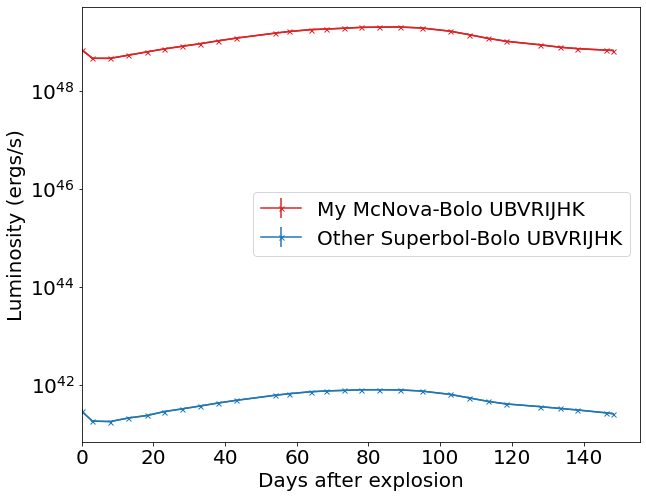

In [5]:
plt.figure(figsize=(10,8))

plt.plot(bolcnova[:,0]-bolcnova[0,0],bolcnova[:,3], color='red')
plt.errorbar(bolcnova[:,0]-bolcnova[0,0], bolcnova[:,3], bolcnova[:,4], marker='x', markersize=5, color='tab:red', label='My McNova-Bolo UBVRIJHK')

# plt.plot(bolsup[:,0]-bolsup[0,0],bolsup[:,3], color='tab:green')
# plt.errorbar(bolsup[:,0]-bolsup[0,0], bolsup[:,3], bolsup[:,4], marker='x', markersize=5, color='tab:green', label='My Superbol-Bolo UBVRIJHK')


plt.plot(bolsupOther[:,0]-bolsupOther[0,0],bolsupOther[:,3], color='tab:blue')
plt.errorbar(bolsupOther[:,0]-bolsupOther[0,0], bolsupOther[:,3], bolsupOther[:,4], marker='x', markersize=5, color='tab:blue', label='Other Superbol-Bolo UBVRIJHK')

# Plotting the other fits to black body


plt.xlabel('Days after explosion')
plt.ylabel('Luminosity (ergs/s)')
plt.legend()
plt.yscale('log')
#plt.ylim(3e40, 4.5e42)
plt.xlim(0,None)

In [2]:
def bb2(x,T,R):
    '''
    Calculate the blackbody radiance for a set
    of wavelengths given a temperature and radiance.
    Modified in the UV

    Parameters
    ---------------
    lam: Reference wavelengths in Angstroms
    T:   Temperature in 10^3 Kelvin
    R:   Radius in 10^15 cm

    Output
    ---------------
    Spectral radiance in units of erg/s/Angstrom

    (calculation and constants checked by Sebastian Gomez)
    '''

    T *= 1000
    R *= 1e15

    # Planck Constant in cm^2 * g / s
    h = 6.62607E-27
    # Speed of light in cm/s
    c = 2.99792458E10

    # Convert wavelength to cm
    lam_cm = x * 1E-8

    # Boltzmann Constant in cm^2 * g / s^2 / K
    k_B = 1.38064852E-16

    # Calculate Radiance B_lam, in units of (erg / s) / cm ^ 2 / cm
    exponential = (h * c) / (lam_cm * k_B * T)
    B_lam = ((2 * np.pi * h * c ** 2) / (lam_cm ** 5)) / (np.exp(exponential) - 1)

    # Multiply by the surface area
    A = 4*np.pi*R**2

    # Output radiance in units of (erg / s) / Angstrom
    Radiance = B_lam * A / 1E8

    return Radiance / 1e40

def bb(lam, T, R):
        '''
        Calculate the corresponding blackbody radiance for a set
        of wavelengths given a temperature and radiance.
        Parameters
        ---------------
        lam: Reference wavelengths in Angstroms
        T:   Temperature in Kelvin
        R:   Radius in cm
        Output
        ---------------
        Spectral radiance in units of erg/s/Angstrom
        (calculation and constants checked by Sebastian Gomez)
        '''

        # Planck Constant in cm^2 * g / s
        h = 6.62607E-27
        # Speed of light in cm/s
        c = 2.99792458E10

        # Convert wavelength to cm
        lam_cm = lam * 1E-8

        # Boltzmann Constant in cm^2 * g / s^2 / K
        k_B = 1.38064852E-16

        # Calculate Radiance B_lam, in units of (erg / s) / cm ^ 2 / cm
        exponential = (h * c) / (lam_cm * k_B * T)        
        B_lam = ((2 * np.pi * h * c ** 2) / (lam_cm ** 5)) / (np.exp(exponential) - 1)

        # Multiply by the surface area
        A = 4*np.pi*R**2

        # Output radiance in units of (erg / s) / Angstrom
        Radiance = B_lam * A / 1E8

        return Radiance

In [14]:
flux = np.array([1.47038309e+45, 1.20368562e+45, 7.28787077e+44, 5.18964728e+44,
       2.55788902e+44, 9.13003085e+43, 3.58937266e+43, 1.62014529e+43])
lam = np.array([ 3600.,  4380.,  5450.,  6410.,  7980., 12200., 16300., 21900.])

lam_array = np.linspace(min(lam), max(lam), 100)

fit = bb(lam_array, 1e4, 1e18); fit2 = bb2(lam_array, 10, 1000)*1e40

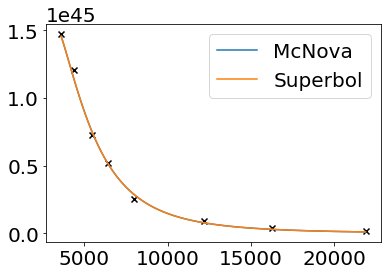

In [15]:
plt.scatter(lam, flux, color='black', marker='x')
plt.plot(lam_array, fit, label='McNova')
plt.plot(lam_array, fit2, label='Superbol')
plt.legend()